## Assignment 5

#### Question 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.genfromtxt('/data9/UN3400/data/brf_temp.txt',
                          delimiter='\t')
data

array([[ 0.0000000e+00, -1.7270000e+01],
       [ 4.1670000e-02, -1.7850000e+01],
       [ 8.3330000e-02, -1.8420000e+01],
       ...,
       [ 3.6516597e+02, -1.4530000e+01],
       [ 3.6520764e+02, -1.4680000e+01],
       [ 3.6525000e+02, -1.4760000e+01]])

#### Question 2 and 3

In [3]:
N, i = np.shape(data)
t = data[:,0:1] # time of year in days

In [7]:
dobs = data[:,1:2]
dobs # setting second column of data as data observed

array([[-17.27],
       [-17.85],
       [-18.42],
       ...,
       [-14.53],
       [-14.68],
       [-14.76]])

In [56]:
M = 3 # quadratic least square estimation
P = 365.25
G = np.zeros((N,M)) # create a zero array
G[0:N,0:1] = np.cos(2*np.pi*t/P) #A
G[0:N,1:2] = np.sin(2*np.pi*t/P) #B
G[0:N,2:3] = np.ones((N,1)) #C
G

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.99999743e-01,  7.16824940e-04,  1.00000000e+00],
       [ 9.99998973e-01,  1.43347749e-03,  1.00000000e+00],
       ...,
       [ 9.99998955e-01, -1.44551917e-03,  1.00000000e+00],
       [ 9.99999735e-01, -7.28694609e-04,  1.00000000e+00],
       [ 1.00000000e+00, -2.44929360e-16,  1.00000000e+00]])

In [57]:
GTG = np.matmul(G.T,G)
GTd = np.matmul(G.T,dobs)
mest = np.linalg.lstsq(GTG,GTd,rcond=None)[0]   #Note: ax = b, x=b/a   # Note2: dobs = G*m
mest

array([[-11.58329959],
       [ -4.27083943],
       [  9.04146981]])

In [79]:
print("dpre = %0.4f cos((2pi/P) * t) + %0.4f sin((2pi/P) * t) + %0.4f" % (mest[0], mest[1], mest[2]))

dpre = -11.5833 cos((2pi/P) * t) + -4.2708 sin((2pi/P) * t) + 9.0415


/tmp/ipykernel_98725/576066431.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("dpre = %0.4f cos((2pi/P) * t) + %0.4f sin((2pi/P) * t) + %0.4f" % (mest[0], mest[1], mest[2]))


In [60]:
dpre = np.matmul(G,mest)
e = dobs - dpre
sigmad2 = np.matmul(e.T,e)/(N-M)

In [61]:
Cd = sigmad2 * np.linalg.inv(GTG)
sm = np.sqrt(np.diag(Cd).reshape(-1,1))
sm

array([[0.07569392],
       [0.07681815],
       [0.05392669]])

In [62]:
print("estimated standard deviation of the data is ", np.sqrt(sigmad2))

estimated standard deviation of the data is  [[4.99470871]]


In [63]:
print("estimated standard deviation of the data is ")
for k in range(M):
    print("model parameter %d: %.4f +/- %.4f" % (k, mest[k,0], 2.0*sm[k,0]))

estimated standard deviation of the data is 
model parameter 0: -11.5833 +/- 0.1514
model parameter 1: -4.2708 +/- 0.1536
model parameter 2: 9.0415 +/- 0.1079


In [90]:
from scipy import optimize

def func(t,A,B,C):
    dpre_sp = A*np.cos(2*np.pi*t/P) + B*np.sin(2*np.pi*t/P) + C
    return dpre_sp

In [69]:
mest_ez = optimize.curve_fit(linfunc, xdata = data[:,0], 
                             ydata = data[:,1])[0]
mest_ez

array([-11.58329959,  -4.27083943,   9.04146981])

In [70]:
import statsmodels.api as smod

In [71]:
result = smod.OLS(dobs,G).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:04:05   Log-Likelihood:                -25988.
No. Observations:                8585   AIC:                         5.198e+04
Df Residuals:                    8582   BIC:                         5.200e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -11.5833      0.076   -153.028      0.0

In [72]:
print("The best fit curve is: y = %0.4f cos((2pi/P) * t) + %0.4f sin((2pi/P) * t) + %0.4f" % (mest[0], mest[1], mest[2]))
print("We have verified that the least squares method for NumPy and SciPy match.")

The best fit curve is: y = -11.5833 cos((2pi/P) * t) + -4.2708 sin((2pi/P) * t) + 9.0415
We have verified that the least squares method for NumPy and SciPy match.


/tmp/ipykernel_98725/2531739985.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The best fit curve is: y = %0.4f cos((2pi/P) * t) + %0.4f sin((2pi/P) * t) + %0.4f" % (mest[0], mest[1], mest[2]))


#### Question 4

In [75]:
D = (mest_ez[0]**2 + mest_ez[1]**2)**(1/2)
D

12.345561903703594

#### Question 5

In [95]:
A = mest_ez[0]
B = mest_ez[1]
C = mest_ez[2]
def d_pre(t,A,B,C):
    return A*np.cos(2*np.pi*t/P) + B*np.sin(2*np.pi*t/P) + C

In [97]:
t_max = minimize_scalar(lambda t: -d_pre(t,A,B,C), bounds=(0, P), method='bounded')
t_max

 message: Solution found.
 success: True
  status: 0
     fun: -21.38703171463939
       x: 203.15942045825108
     nit: 9
    nfev: 9

In [99]:
print("The maximum value of d^pre, t_max, is 21.39ºC at t = 203 (day)")

The maximum value of d^pre, t_max, is 21.39ºC at t = 203 (day)


#### Question 6

Text(0.5, 1.0, 'Air Temperature at Black Rock Forest Over a Year: observed (red), predicted (black)')

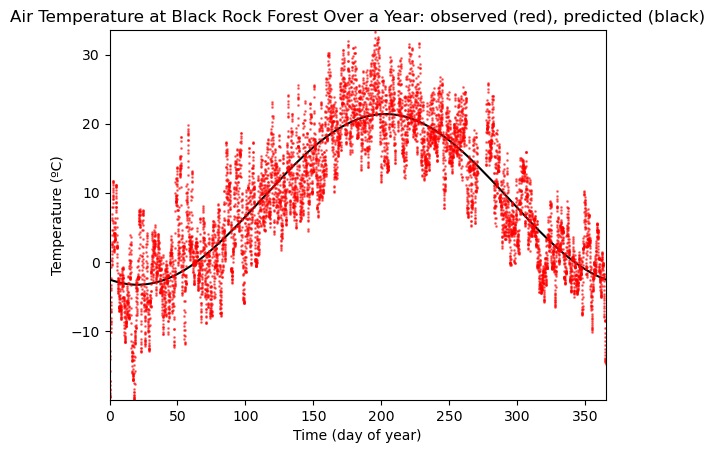

In [78]:
fig,ax = plt.subplots()
plt.axis([np.min(t), np.max(t), np.min(dobs), np.max(dobs)])
plt.plot(t,dpre,'k-')
plt.plot(t,dobs,'ro', markersize=1, alpha=0.5)
plt.xlabel('Time (day of year)')
plt.ylabel('Temperature (ºC)')
plt.title('Air Temperature at Black Rock Forest Over a Year: observed (red), predicted (black)')

Text(0.5, 1.0, 'Predicted Error of the Model of Air Temperature at Black Rock Forest')

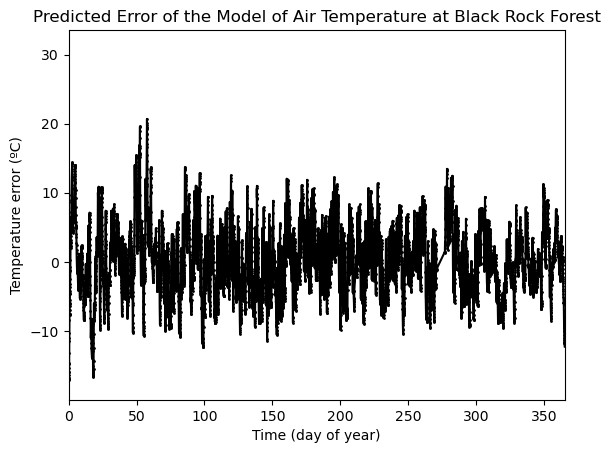

In [77]:
fig,ax = plt.subplots()
plt.axis([np.min(t), np.max(t), np.min(dobs), np.max(dobs)])
plt.plot(t,e,'ko-', markersize=1)
plt.xlabel('Time (day of year)')
plt.ylabel('Temperature error (ºC)')
plt.title('Predicted Error of the Model of Air Temperature at Black Rock Forest')